<h1 style="text-align:center;font-size:36px;font-weight:bold;">Introduction to the brightwind library</h1>

In [2]:
import datetime
print('Last updated: {}'.format(datetime.date.today().strftime('%d %B, %Y')))

Last updated: 15 October, 2024


<hr class="gray-line">
<font size="6">Outline:</font>

This tutorial provides a quick summary of some of the main functionality of the brightwind library. The following topics are included, most of which are covered in more detail within subsequent tutorials:


    1.Using the brightwind library in a Jupyter Notebook
    2.Importing data
    3.Applying cleaning to data
    4.Checking basic statistics and time continuity
    5.Plotting monthly means
    6.Plotting sector ratios
    7.Plotting a ‘12x24’ distribution
    8.Scaling a wind speed
    9.Plotting a wind rose and exporting a .tab file

<hr class="gray-line">
<font size="6">Demo datasets</font>

To follow along with this and the other tutorials you can download the demo datasets from Dropbox, and save them locally on your computer.

<hr class="gray-line">
<font size="6">Using the brightwind library in a Jupyter Notebook</font>

This, and all the tutorials, will use Jupyter Notebooks as the interface with the library. If you don’t know how to launch a Jupyter Notebook please refer to the end of the Getting started on Windows tutorial. If you need to install it then look to the start of that tutorial.

Once a Jupyter Notebook is opened in your browser, the first thing to do is import the brightwind library.

In [2]:
import brightwind as bw

With the brightwind library installed and imported in your Jupyter Notebook, you can begin to analyse data using a wide range of functions available in the library. A list of these functions is displayed when you type ‘bw.’ in the calculation cell and then press the ‘Tab’ key.

<img src="E:\\Programs\\brightwind\\bw20241015\\Picture\\Introduction_1.png" alt="图片描述" style="width:300px;height:200px;">

Once you have selected a function from the list, click on the function name and insert and open parenthesis, e.g.:

In [3]:
bw.monthly_means()

TypeError: monthly_means() missing 1 required positional argument: 'data'

To view the list of necessary inputs for this function, press the ‘Shift’ and ‘Tab’ keys simultaneously. A drop-down box containing the signature and docstring of the function will be displayed. The docstring explains the required inputs and their formats for each function. The docstring displayed also gives an example usage of the function and some other helpful information about its use. To view the docstring, click on the ‘+’ sign displayed in the pop up box:

<img src="E:\Programs\brightwind\bw20241015\Picture\Introduction_2.png" alt="图片描述" style="width:300px;height:200px;">

The signature section of the docstring explains the arguments of the function. Some arguments are required for the function to run, e.g. data in monthly_means(), while other named arguments have default values defined and do not need to be specified, e.g. return_data in monthly_means() which has a default value of False.

<img src="E:/Programs/brightwind/bw20241015/Picture/Introduction_3.png" alt="图片描述" style="width:300px;height:200px;">

<hr class="gray-line">
<font size="6">Importing Data</font>

Most wind data analysis will start with importing data from .csv files, Excel spreadsheets or similar.

<span style="color:white;">•</span>  To follow along with this and the other tutorials you can download some demo datasets from Dropbox here, and save them locally on your computer.

<span style="color:white;">•</span>  To import data into the workspace from a .csv file, we can use then use load_csv() function.

<span style="color:white;">•</span>  If the local directory of this file is ’C:\Users\Stephen\Documents\Analysis\demo_data.csv’, we can use the following command to load it into a data frame called ‘data’.

<span style="color:white;">•</span>  After typing it out, the command can be run by pressing ‘Shift’ and ‘Enter’.

<span style="color:white;">•</span>  This will load the data from the .csv into a pandas DataFrame, which is essentially a spreadsheet in the Python environment.

In [7]:
data = bw.load_csv(r'E:\Programs\brightwind\brightwind\demo_datasets\demo_data.csv')

To view the DataFrame, type data and press ‘Shift’ + ‘Enter’ to run the cell.

To keep things concise, below we will use the .head() function to only call the first 5 entries in the dataset.

In [8]:
data.head(5)

,Spd80mN,Spd80mS,Spd60mN,Spd60mS,Spd40mN,Spd40mS,Spd80mNStd,Spd80mSStd,Spd60mNStd,Spd60mSStd,...,Dir78mSStd,Dir58mS,Dir58mSStd,Dir38mS,Dir38mSStd,T2m,RH2m,P2m,PrcpTot,BattMin
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-09 15:30:00,8.370,7.911,8.160,7.849,7.857,7.626,1.240,1.075,1.060,0.947,...,6.100,110.1,6.009,112.2,5.724,0.711,100.0,935.0,0.0,12.94
2016-01-09 15:40:00,8.250,7.961,8.100,7.884,7.952,7.840,0.897,0.875,0.900,0.855,...,5.114,110.9,4.702,109.8,5.628,0.630,100.0,935.0,0.0,12.95
2016-01-09 17:00:00,7.652,7.545,7.671,7.551,7.531,7.457,0.756,0.703,0.797,0.749,...,4.172,113.1,3.447,111.8,4.016,1.126,100.0,934.0,0.0,12.75
2016-01-09 17:10:00,7.382,7.325,6.818,6.689,6.252,6.174,0.844,0.810,0.897,0.875,...,4.680,118.8,5.107,115.6,5.189,0.954,100.0,934.0,0.0,12.71
2016-01-09 17:20:00,7.977,7.791,8.110,7.915,8.140,7.974,0.556,0.528,0.562,0.524,...,3.123,115.9,2.960,113.6,3.540,0.863,100.0,934.0,0.0,12.69


Now that data is loaded into the workspace, it can be analysed using various brightwind functions. Most of these functions require data in the form of a DataFrame or a Series (a one-dimensional DataFrame).

<hr class="gray-line">
<font size="6">Applying cleaning to data</font>

The apply_cleaning() function can be used to quickly apply an exisiting cleaning file to the data using the following commands.

In [10]:
# specify location of associated cleaning file
cleaning_file_path = r'E:\Programs\brightwind\brightwind\demo_datasets\demo_cleaning_file.csv'

# apply cleaning
data = bw.apply_cleaning(data, cleaning_file_path)

Cleaning applied. (Please remember to assign the cleaned returned DataFrame to a variable.)

<hr class="gray-line">
<font size="6">Checking basic statistics and time continuity</font>

The code below can be used to specify the names of each wind speed variable within the dataset.

In [11]:
# create list of columns which include each wind speed variable
anemometers = ['Spd80mN', 'Spd80mS', 'Spd60mN', 'Spd60mS', 'Spd40mN', 'Spd40mS']

This list can then be used to apply functions like basic_stats() to these variables only.

In [12]:
# show basic statistics of the anemometer variables within the clean dataset
bw.basic_stats(data[anemometers])

,count,mean,std,min,max
Spd80mN,95180.0,7.518636,3.994552,0.215,29.00
Spd80mS,83629.0,7.390041,3.997481,0.094,29.27
Spd60mN,95180.0,7.052587,3.806488,0.214,28.22
Spd60mS,95180.0,7.135864,3.898363,0.080,29.03
Spd40mN,95180.0,6.761385,3.735660,0.228,27.38
Spd40mS,95180.0,6.820594,3.810865,0.092,28.45


In [13]:
# list all gaps within the dataset
bw.time_continuity_gaps(data)

,Date From,Date To,Days Lost
17747,2016-05-11 23:00:00,2016-05-31 15:20:00,19.673611


<hr class="gray-line">
<font size="6">Plotting monthly means</font>

monthly_means() can be used to plot the mean monthly values of an input parameter. In the example below, the function is used to return both a plot (‘monthly_mean_plot’) and numerical values (‘monthly_means’). The ‘return_coverage’ argument is also used to show the proportion of data coverage alongside each monthly mean value.

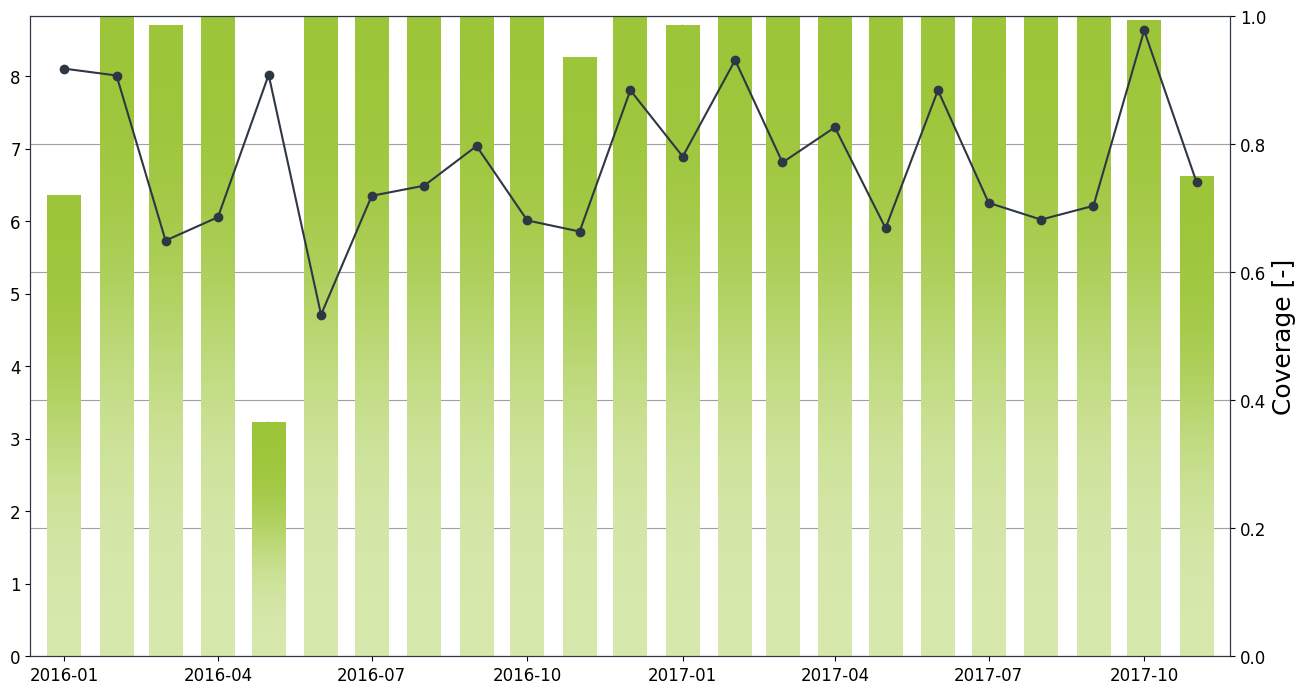

In [14]:
monthly_means_plot, monthly_means = bw.monthly_means(data.Spd40mN, return_coverage=True)
monthly_means_plot

<hr class="gray-line">
<font size="6">Plotting sector ratios</font>

The sector_ratio() function can be used to confirm reported boom orientations at a given height on the mast.

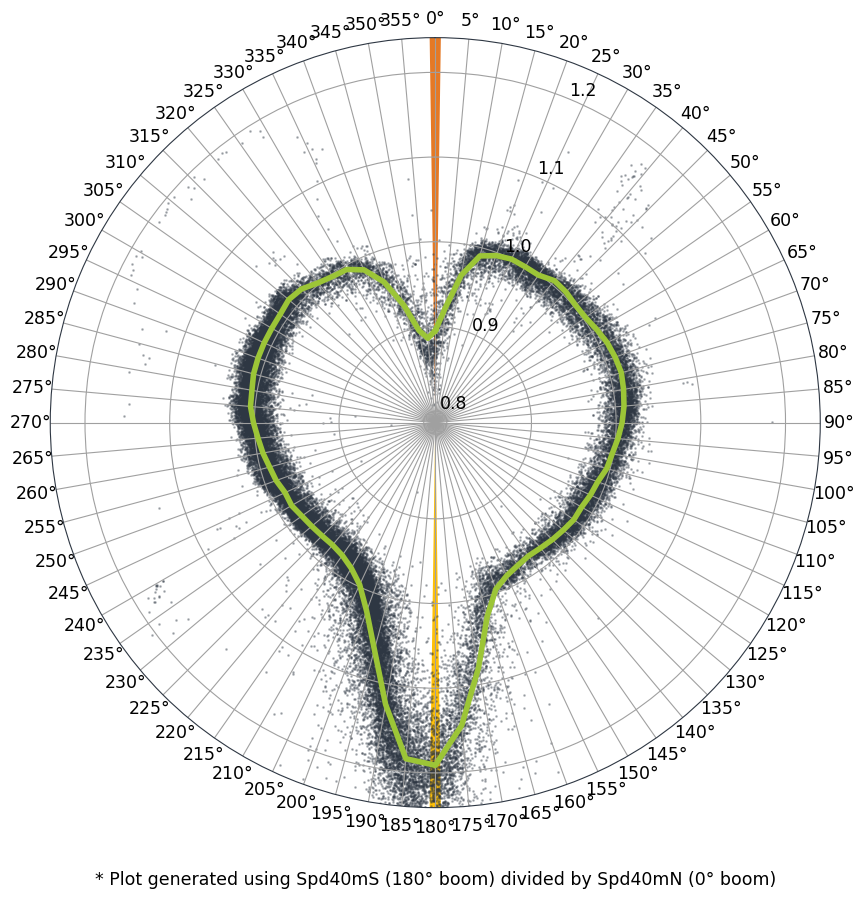

In [16]:
bw.sector_ratio(data.Spd40mN, data.Spd40mS, data.Dir78mS, boom_dir_1=0, boom_dir_2=180)

<hr class="gray-line">
<font size="6">Plotting a ‘12x24’ distribution</font>

The dist_12x24() function can be used to visualise the level of diurnal and seasonal variation of a given parameter.

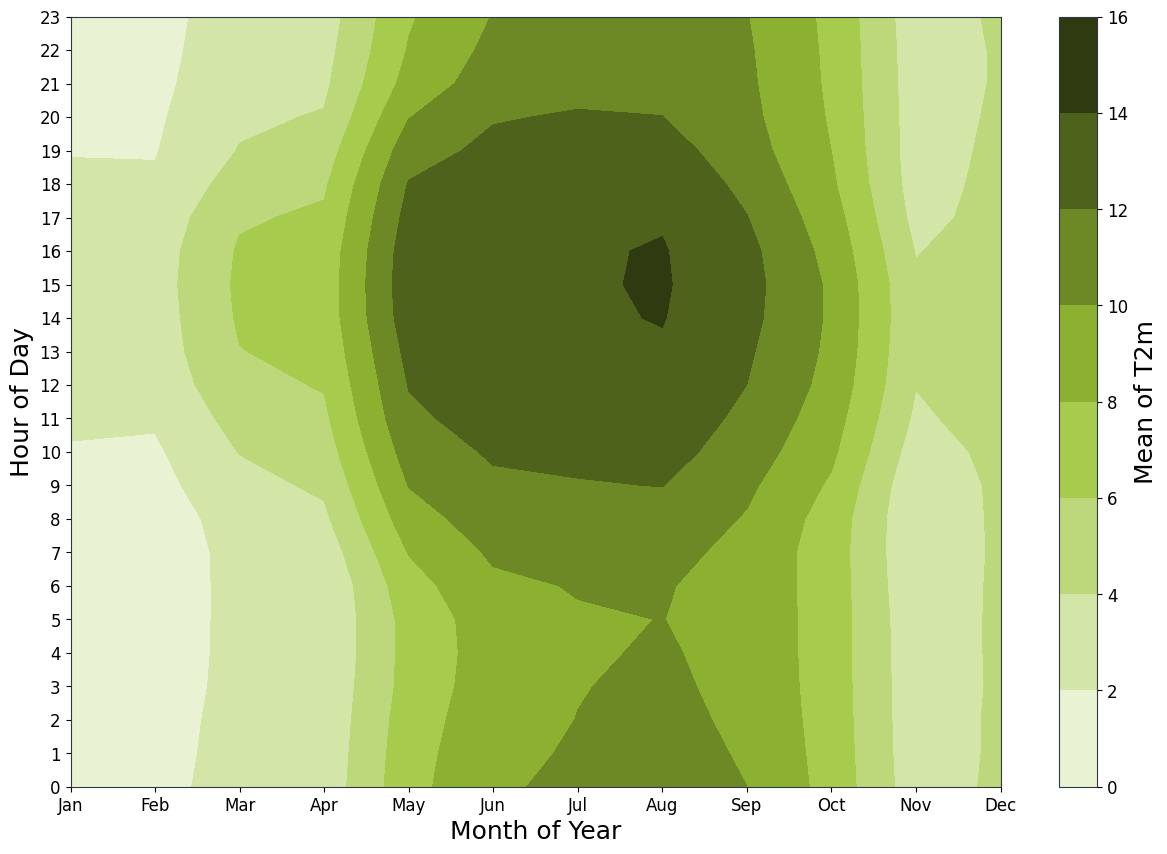

In [18]:
bw.dist_12x24(data.T2m)

<hr class="gray-line">
<font size="6">Scaling a wind speed</font>

The scale_wind_speed() function can be used to apply a given scale factor to a wind speed variable as follows.

In [20]:
# specify scale factor
scale_factor = 1.03

# apply scale factor to Spd80mN variable
Spd80mN_scaled = bw.scale_wind_speed(data.Spd80mN, scale_factor)

# show first 5 rows of result
Spd80mN_scaled.head(5)

Timestamp
2016-01-09 15:30:00        NaN
2016-01-09 15:40:00        NaN
2016-01-09 17:00:00        NaN
2016-01-09 17:10:00    7.60346
2016-01-09 17:20:00    8.21631
Name: Spd80mN, dtype: float64

In [ ]:
Plotting a wind rose and exporting a .tab file

<hr class="gray-line">
<font size="6">Plotting a wind rose and exporting a .tab file</font>

The freq_table() function compiles a directional frequency distribution from a concurent speed and direction time series. In the case below, we specify two outputs: a wind rose plot (‘rose’) and its associated numerical values (‘freq_table’).

In [21]:
rose, freq_table = bw.freq_table(Spd80mN_scaled, data.Dir78mS, return_data=True)

Once created, we can call the wind rose plot by typing its name.

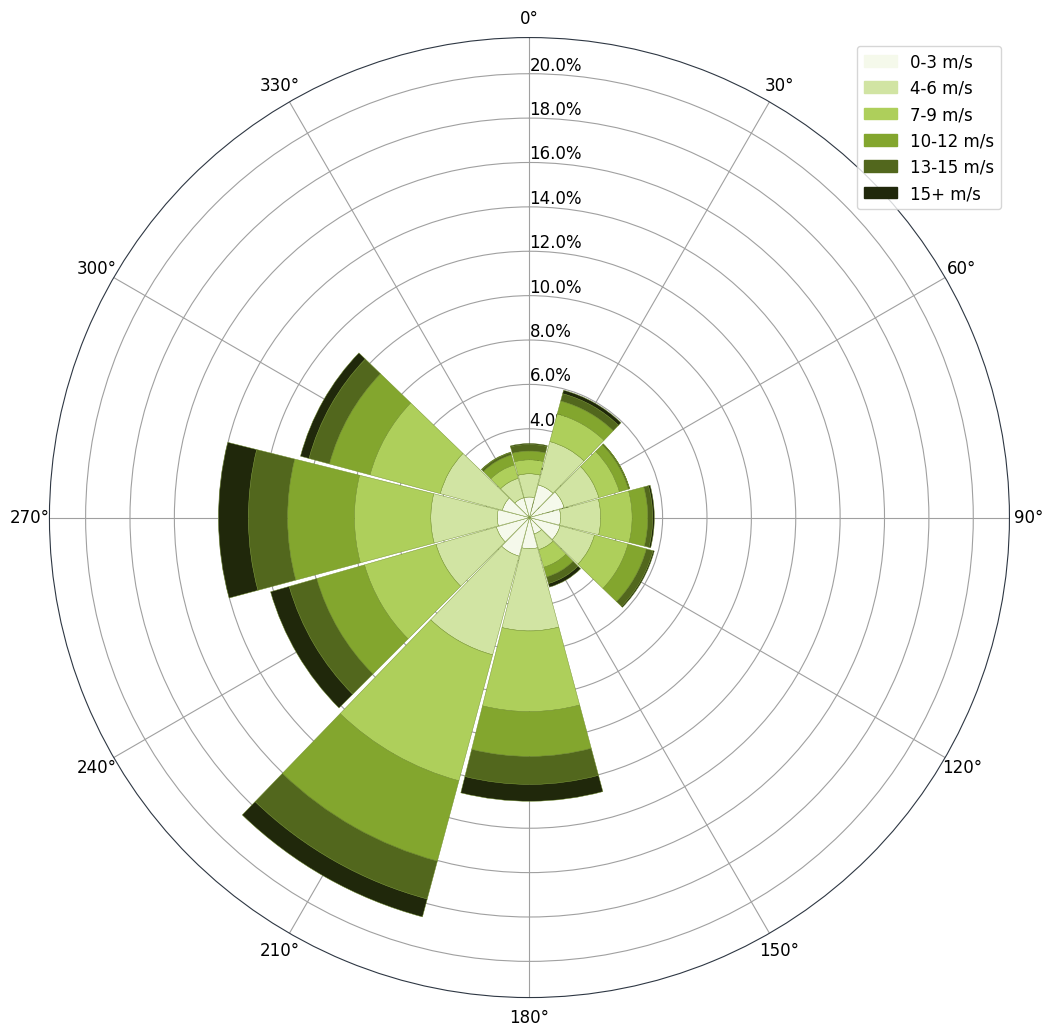

In [22]:
rose

And we can export the numerical data in the form of a ‘.tab’ file into the current directory as follows.

In [23]:
bw.export_tab_file(freq_table, 80, 54, -8, 'name_of_file')

Export of tab file "name_of_file.tab" successful.
Mean wind speed derived from this tab file is: 7.690 m/s.
Latitude: 54.0N, Longitude: -8.0E, Height: 80 m



Export of tab file successful.

In [ ]:
<hr class="gray-line">
<font size="6">Demo datasets</font>